In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [2]:
#Create a Spark Application

spark = SparkSession.builder.appName("Olympic_Games").getOrCreate()

athlete_events = spark.read.csv("file:///home/hduser/demo_1/athlete_events.csv",sep=',',inferSchema=True,header=True)

In [3]:
athlete_events.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [4]:
athlete_events.count()

271116

In [5]:
print(athlete_events.count(),len(athlete_events.columns))

271116 15


In [6]:
athlete_events = athlete_events.dropDuplicates()

In [7]:
athlete_events.count()

269729

In [8]:
athlete_events_final = athlete_events. \
withColumn("Age",col("Age").cast("Integer")). \
withColumn("Height",col("Height").cast("Integer")). \
withColumn("Weight",col("Weight").cast("Integer"))

In [9]:
athlete_events_final.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [11]:
athlete_events_final.createOrReplaceTempView("athlete_events_final_view")

In [12]:
distribution_age__gold_medals = spark.sql("select Age, count(Medal) as total_medal from athlete_events_final_view where Medal ='Gold' and Age >0 group by Age order by Age asc ")

In [13]:
distribution_age__gold_medals.show(10)

+---+-----------+
|Age|total_medal|
+---+-----------+
| 13|          7|
| 14|         27|
| 15|         75|
| 16|        113|
| 17|        189|
| 18|        278|
| 19|        457|
| 20|        666|
| 21|        910|
| 22|       1087|
+---+-----------+
only showing top 10 rows



In [14]:
distribution_age__gold_medals_pd = distribution_age__gold_medals.toPandas()

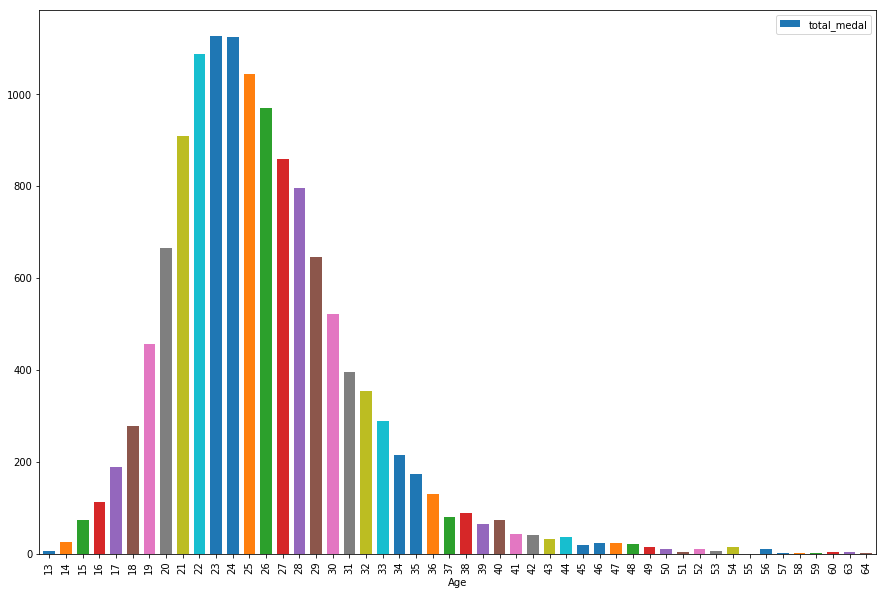

In [16]:
distribution_age__gold_medals_pd.plot(kind='bar',x='Age',y='total_medal',figsize=(15,10),width=0.7)